training with 0.05 finished with train acc 0.54 and val acc 0.53
training with 0.025 finished with train acc 0.56 and val acc 0.56
training with 0.0125 finished with train acc 0.64 and val acc 0.6
training with 0.00625 finished with train acc 0.66 and val acc 0.64
training with 0.003125 finished with train acc 0.65 and val acc 0.61
training with 0.0015625 finished with train acc 0.62 and val acc 0.58
training with 0.00078125 finished with train acc 0.55 and val acc 0.52
training with 0.000390625 finished with train acc 0.59 and val acc 0.57
training with 0.0001953125 finished with train acc 0.61 and val acc 0.57
training with 9.765625e-05 finished with train acc 0.6 and val acc 0.58


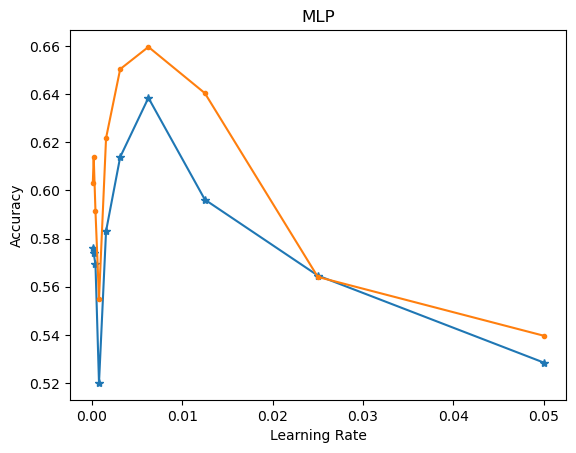

0.6030769230769231
95% Confidence Interval
0.08843143300430714


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

csv_training_data = pd.read_csv('training data.csv')
train_data = csv_training_data.to_numpy()

X_train = np.array(train_data[556:,2:27],dtype=float)
X_train_normalized = scaler.fit_transform(X_train)

X_test = np.array(train_data[1300:,2:27],dtype=float)
X_test_normalized = scaler.fit_transform(X_test)

Y_train = np.array(train_data[556:,27].transpose(), dtype=float)
Y_test = np.array(train_data[1300:,27].transpose(), dtype=float)

train_acc = []
val_acc = []
lrs = []
start = 0.1
for i in range(10):
    start*=0.5
    lrs.append(start)

for i, lr in enumerate(lrs):
    #solver default Adam, activation default relu, shuffle default true
    clf = MLPClassifier(batch_size=100, learning_rate_init=lr, hidden_layer_sizes=(50,100,50), 
                        max_iter=500)
    score = ms.cross_validate(clf, X_train, Y_train, cv=5, return_train_score=True)
    train_acc.append(np.mean(score['train_score']))
    val_acc.append(np.mean(score['test_score']))
    print(f'training with {lr} finished with train acc {round(train_acc[i], 2)} and val acc {round(val_acc[i],2)}')

plt.plot(lrs,val_acc, label="Training Acc", marker='*')
plt.plot(lrs,train_acc, label="Validation Acc", marker='.')
plt.title("MLP")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()